In [2]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:

cty_boundary = gpd.read_file(r'data\GeoJson\2021_EDM_census_boundary.geojson')

In [9]:
cty_boundary

,dguid,boundary_type,cdname,ccsname,cmatype,ccsuid,_predicate,cmaname,landarea,cduid,dauid,cmapuid,cdtype,pruid,dguidp,cmauid,geometry
0,2021A00034811,Census Division,Division No. 11,None,None,None,None,None,15746.415,4811,None,None,CDR,48,None,None,"MULTIPOLYGON (((-113.69397 53.99268, -113.6697..."
1,2021S051248112107,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,14.237,None,48112107,None,None,48,None,None,"MULTIPOLYGON (((-113.39391 53.52664, -113.3938..."
2,2021S051248112108,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,0.1628,None,48112108,None,None,48,None,None,"MULTIPOLYGON (((-113.41847 53.53588, -113.4184..."
3,2021S051248112109,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,0.2837,None,48112109,None,None,48,None,None,"MULTIPOLYGON (((-113.43150 53.53760, -113.4303..."
4,2021S051248112110,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,0.3243,None,48112110,None,None,48,None,None,"MULTIPOLYGON (((-113.41841 53.54107, -113.4183..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,2021S051248112848,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,0.2872,None,48112848,None,None,48,None,None,"MULTIPOLYGON (((-113.50111 53.53722, -113.5010..."
1388,2021S051248112849,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,0.0408,None,48112849,None,None,48,None,None,"MULTIPOLYGON (((-113.50856 53.53722, -113.5085..."
1389,2021S051248112853,Census Dissemination Area,None,Edmonton,None,4811061,INTERSECTS,None,74.0198,None,48112853,None,None,48,None,None,"MULTIPOLYGON (((-113.30033 53.85051, -113.3001..."
1390,2021S05024811061,Census Subdivision,None,Edmonton,None,4811061,None,None,765.6076,None,None,None,None,48,None,None,"MULTIPOLYGON (((-113.29507 53.69082, -113.2950..."


<Axes: >

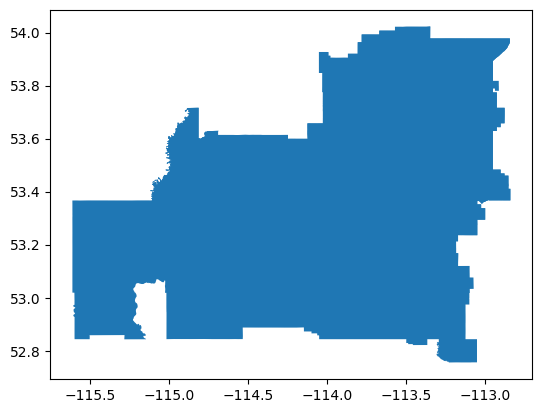

In [10]:
cty_boundary.plot()

In [13]:
#ward_boundary = gpd.read_file(r'data\GeoJson\CityofEdmontonWardBoundaryandCouncil.geojson')
nbhd = gpd.read_file(r'data\GeoJson\EdmontonNeighbourhoods_20231110.geojson')

<Axes: >

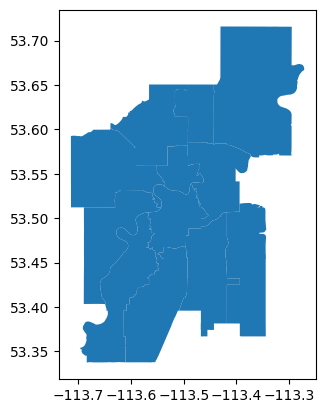

In [12]:
ward_boundary.plot()

<Axes: >

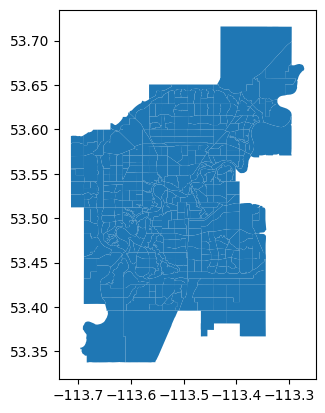

In [14]:
nbhd.plot()

In [24]:
nbhd.head(15)

,neighbourhood_number,name,effective_end_date,descriptive_name,description,civic_ward_name,effective_start_date,district,geometry
0,2010,ABBOTTSFIELD,None,Abbottsfield,"Abbottsfield was once owned by E.F. Carey, one...",Métis,1981-10-01,118 Avenue,"MULTIPOLYGON (((-113.38763 53.57613, -113.3888..."
1,3460,ALBANY,None,Albany,None,Anirniq,2011-06-13,Northwest,"MULTIPOLYGON (((-113.56025 53.63160, -113.5622..."
2,1010,ALBERTA AVENUE,None,Alberta Avenue,One of the city's older residential neighbourh...,Métis,1981-10-01,118 Avenue,"MULTIPOLYGON (((-113.49226 53.57662, -113.4922..."
3,4010,ALBERTA PARK INDUSTRIAL,None,Alberta Park Industrial,This non-residential neighbourhood is largely ...,Nakota Isga,1981-10-01,Jasper Place,"MULTIPOLYGON (((-113.59041 53.56654, -113.5904..."
4,6669,ALCES,None,Alces,Formerly Decoteau North,Sspomitapi,2019-07-25,Ellerslie,"MULTIPOLYGON (((-113.37649 53.42488, -113.3690..."
5,4020,ALDERGROVE,None,Aldergrove,"Planned in the 1970s, this area's multi-family...",Nakota Isga,1981-10-01,West Edmonton,"MULTIPOLYGON (((-113.65209 53.51950, -113.6520..."
6,5458,ALLARD,None,Allard,None,Ipiihkoohkanipiaohtsi,2011-07-18,Southwest,"MULTIPOLYGON (((-113.51693 53.40651, -113.5176..."
7,5010,ALLENDALE,None,Allendale,"Once farmed by the Allen family, this area was...",papastew,1981-10-01,Scona,"MULTIPOLYGON (((-113.50260 53.50637, -113.5027..."
8,5505,AMBLESIDE,None,Ambleside,The name Ambleside most likely originates from...,pihêsiwin,2007-07-19,Southwest,"MULTIPOLYGON (((-113.56982 53.42491, -113.5698..."
9,4011,ANTHONY HENDAY,None,Anthony Henday,This non-residential neighbourhood forms part ...,Nakota Isga,1981-10-01,West Henday,"MULTIPOLYGON (((-113.66520 53.52545, -113.6656..."


In [15]:
gdf = gpd.read_file(r'data\GeoJson\geos.geojson')

<Axes: >

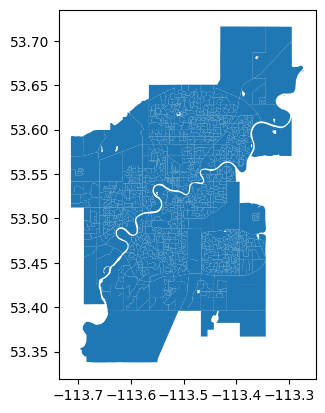

In [16]:
gdf.plot()

In [17]:
gdf.columns.to_list()

['a',
 'q',
 't',
 'dw',
 'hh',
 'id',
 'pop',
 'name',
 'rgid',
 'rpid',
 'ruid',
 'rguid',
 'geometry']

<Axes: >

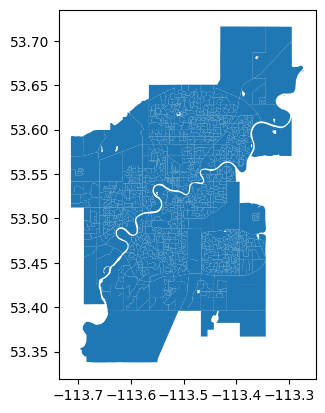

In [19]:
gdf.plot()

In [20]:
gdf.head()

,a,q,t,dw,hh,id,pop,name,rgid,rpid,ruid,rguid,geometry
0,0.2533,0,DA,348,313,48110083,638,48110083,4811,4811061,8350042.01,48835,"MULTIPOLYGON (((-113.38722 53.57092, -113.3869..."
1,0.0063,0,DA,5,5,48110084,17,48110084,4811,4811061,8350058.00,48835,"MULTIPOLYGON (((-113.39366 53.57588, -113.3937..."
2,0.183,0,DA,252,220,48110085,525,48110085,4811,4811061,8350058.00,48835,"MULTIPOLYGON (((-113.39359 53.57044, -113.3936..."
3,0.163,0,DA,163,152,48110086,385,48110086,4811,4811061,8350058.00,48835,"MULTIPOLYGON (((-113.39359 53.57044, -113.3938..."
4,0.0924,0,DA,109,101,48110087,238,48110087,4811,4811061,8350058.00,48835,"MULTIPOLYGON (((-113.39472 53.57591, -113.3947..."


In [21]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   a         1352 non-null   object  
 1   q         1352 non-null   object  
 2   t         1352 non-null   object  
 3   dw        1352 non-null   object  
 4   hh        1352 non-null   object  
 5   id        1352 non-null   object  
 6   pop       1352 non-null   object  
 7   name      1352 non-null   object  
 8   rgid      1352 non-null   object  
 9   rpid      1352 non-null   object  
 10  ruid      1352 non-null   object  
 11  rguid     1352 non-null   object  
 12  geometry  1352 non-null   geometry
dtypes: geometry(1), object(12)
memory usage: 137.4+ KB


In [22]:
gdf['q'].unique()

array(['0'], dtype=object)

In [23]:
gdf['name'].head()

0    48110083
1    48110084
2    48110085
3    48110086
4    48110087
Name: name, dtype: object

In [31]:
map = gpd.read_file(r'data\GeoJson\map (1).geojson')

In [32]:
map.head()

,dguid,boundary_type,cdname,ccsname,cmatype,ccsuid,_predicate,cmaname,landarea,cduid,dauid,cmapuid,cdtype,pruid,dguidp,cmauid,geometry
0,None,None,None,None,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,None,"POLYGON ((-113.36419 53.43965, -113.36429 53.4..."
1,2021S051248112107,Census Dissemination Area,None,Edmonton,None,4811061.0,INTERSECTS,None,14.2370,None,48112107.0,None,None,48.0,None,None,"MULTIPOLYGON (((-113.39391 53.52664, -113.3938..."
2,2021S051248112108,Census Dissemination Area,None,Edmonton,None,4811061.0,INTERSECTS,None,0.1628,None,48112108.0,None,None,48.0,None,None,"MULTIPOLYGON (((-113.41847 53.53588, -113.4184..."
3,2021S051248112109,Census Dissemination Area,None,Edmonton,None,4811061.0,INTERSECTS,None,0.2837,None,48112109.0,None,None,48.0,None,None,"MULTIPOLYGON (((-113.43150 53.53760, -113.4303..."
4,2021S051248112110,Census Dissemination Area,None,Edmonton,None,4811061.0,INTERSECTS,None,0.3243,None,48112110.0,None,None,48.0,None,None,"MULTIPOLYGON (((-113.41841 53.54107, -113.4183..."


<Axes: >

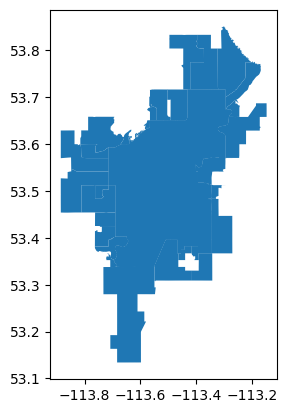

In [33]:
map.plot()